# Академия Аналитиков Авито

# Эконометрика

# Домашняя работа №2

## №1 (20 баллов)

- Допустим, у нас есть подобная регрессия (допустим, что мы центрировали переменные):
$
y = \beta_1 \cdot X_1 + \beta_2 \cdot X_2 + u
$
- Однако, наш $X_2$ абсолютно линейно зависит от $X_1$:
$
X_2 = \mu \cdot X_1
$

- Выразите через $X_1$:  
    - $
\sum{X_2^2} = \mu^2 * \sum{X_1^2}
$
    - $
\sum{X_2 \cdot y} = \sum\mu*X_1*(\beta_1X_1+\beta_2 \mu X_1 + u) = \mu \sum(\beta_1 X_1^2 + \beta_2 \mu X_1^2 + X_1u) = \mu(\beta_1+ \mu \beta_2)\sum X_1^2 + \mu u \sum X_1
$
    - $
\sum{X_1 \cdot X_2} = \mu \sum X_1^2
$

- А теперь выразите $\beta_2$, зная формулу для нее в случае регрессии с двумя переменными, через $X_1$
$$
\beta_2 = \frac{\sum{X_1 \cdot y} \cdot \sum{X_2^2} - \sum{X_2 \cdot y} \cdot \sum{X_1 \cdot X_2}}{\sum{X_1^2} \cdot \sum{X_2^2} - (\sum{X_1 \cdot X_2})^2} = \frac{((\beta_1 + \mu \beta_2)\sum X_1^2 + u\sum X_1)(\mu^2 \sum X_1^2) - (\mu(\beta_1 + \mu \beta_2)\sum X_1^2 + \mu u \sum X_1)(\mu \sum X_1^2)}{\mu^2 \sum X_1^2 \cdot \sum X_1^2 - \mu^2 \sum X_1^2 \cdot \sum X_1^2} = \frac{(\sum X_1^2)^2(\mu^2(\beta_1 + \mu \beta_2) - \mu^2(\beta_1 + \mu \beta_2)) + \sum X_1 \sum X_1^2 \cdot (\mu^2u - \mu^2u)}{\mu^2 \sum X_1^2 \cdot \sum X_1^2 - \mu^2 \sum X_1^2 \cdot \sum X_1^2}
$$

- Что вы можете сказать? Что произошло с коэффициентом?

Возникла неопределенность $\frac{0}{0}$

### №2 (20 баллов)

- Давайте разберем такой замечательный пример из статьи [Stambaugh (1999)](https://repository.upenn.edu/fnce_papers/367/)
- Суть достаточно простая. Когда мы пытаемся предсказать доходности ценных бумаг (например, акций) с помощью регрессоров, которые весьма постоянны во времени (например, дивидендная доходность, которая редко меняется, т.к. компании редко сильно меняют свою дивидендную политику, чтобы не отпугнуть инвесторов), то мы получаем смещение наших оценок коэффициентов для регрессии доходности
- У нас есть:
$$
r_t = \alpha + x_{t-1} \cdot \beta + \varepsilon_t \\ 
x_t = \theta + x_{t-1} \cdot \gamma + u_t \\ 
\varepsilon_t = \phi \cdot u_t + w_t
$$
Где, $w_t$ независим от $u_t$ и $x_t$, $\gamma \in (0, 1)$
- Нам с вами надо посмотреть, что будет с $\hat{\beta}$
- Для этого надо сначала посчитать:
    - $
\hat{\gamma} = \frac{cov(x_{t-1}, y)}{var(x_{t-1})} = \frac{cov(x_{t-1}, \theta + x_{t-1} \cdot \gamma + u_t)}{var(x_{t-1})} = \frac{var(x_{t-1}) \cdot \gamma + cov(x_{t-1}, u_t)}{var(x_{t-1})} = \gamma + \frac{cov(x_{t-1}, u_t)}{var(x_{t-1})}
$  
    - $
\hat{\gamma} - \gamma = \frac{cov(x_{t-1}, u_t)}{var(x_{t-1})}
$  
    - $
\hat{\beta} = \frac{cov(x_{t-1}, \alpha + x_{t-1} \cdot \beta + \varepsilon_t)}{var(x_{t-1})} = \frac{cov(x_{t-1}, \alpha + x_{t-1} \cdot \beta + \phi \cdot u_t + w_t)}{var(x_{t-1})} = \frac{\beta \cdot var(x_{t-1}) + \phi \cdot cov(x_{t-1}, u_t)}{var(x_{t-1})} = \beta + \phi \cdot (\hat{\gamma} - \gamma)
$
    - $
\hat{\beta} - \beta = \phi \cdot (\hat{\gamma} - \gamma)
$  
- Какой вывод можно сделать? Какие предпосылки вы использовали?

## №3 (60 баллов)

- Давайте вернемся к уже известному датасету с машинами

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
import numpy as np

- У нас есть следующий датасет
- Нам хочется понять от чего зависит цена на машину
- Сам датасет составлен из стоимости автомобилей и их характеристик в 1978 г.
    - "make" - марка и модель автомобиля
    - "price" - цена
    - "mpg" - пробег
    - "rep78" - кол-во записей о ремонте к 1978 г.
    - "headroom" - габаритная высота
    - "trunk" - размер багажника
    - "weight" - вес
    - "length" - длина
    - "turn" - радиус разворота
    - "displacement" - объем двигателя
    - "gear_ratio" - передаточное число
    - "foreing" - происхождение автомобиля

In [2]:
df = pd.read_csv('HW_002_001.csv')

In [3]:
df.head(5)

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
0,AMC Concord,4099,22,3.0,2.5,11,2930,186,40,121,3.58,Domestic
1,AMC Pacer,4749,17,3.0,3.0,11,3350,173,40,258,2.53,Domestic
2,AMC Spirit,3799,22,NaN,3.0,12,2640,168,35,121,3.08,Domestic
3,Buick Century,4816,20,3.0,4.5,16,3250,196,40,196,2.93,Domestic
4,Buick Electra,7827,15,4.0,4.0,20,4080,222,43,350,2.41,Domestic


- Вы уже пытались построить всякие разные модификации линейной регресии
- Давайте же попробуем сделать опять все то же самое (можете взять ту модель, которую успели сделать на занятии)

In [4]:
df.describe()

,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio
count,74.000000,74.000000,69.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,6165.256757,21.297297,3.405797,2.993243,13.756757,3019.459459,187.932432,39.648649,197.297297,3.014865
std,2949.495885,5.785503,0.989932,0.845995,4.277404,777.193567,22.266340,4.399354,91.837219,0.456287
min,3291.000000,12.000000,1.000000,1.500000,5.000000,1760.000000,142.000000,31.000000,79.000000,2.190000
25%,4220.250000,18.000000,3.000000,2.500000,10.250000,2250.000000,170.000000,36.000000,119.000000,2.730000
50%,5006.500000,20.000000,3.000000,3.000000,14.000000,3190.000000,192.500000,40.000000,196.000000,2.955000
75%,6332.250000,24.750000,4.000000,3.500000,16.750000,3600.000000,203.750000,43.000000,245.250000,3.352500
max,15906.000000,41.000000,5.000000,5.000000,23.000000,4840.000000,233.000000,51.000000,425.000000,3.890000


array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'mpg'}>,
        <Axes: title={'center': 'rep78'}>],
       [<Axes: title={'center': 'headroom'}>,
        <Axes: title={'center': 'trunk'}>,
        <Axes: title={'center': 'weight'}>],
       [<Axes: title={'center': 'length'}>,
        <Axes: title={'center': 'turn'}>,
        <Axes: title={'center': 'displacement'}>],
       [<Axes: title={'center': 'gear_ratio'}>, <Axes: >, <Axes: >]],
      dtype=object)

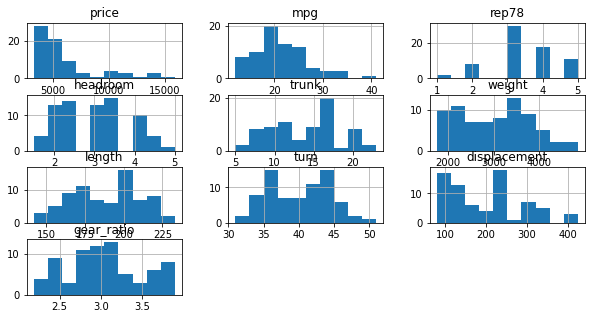

In [5]:
df.hist(figsize = (10, 5))

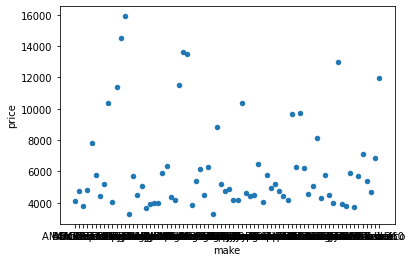

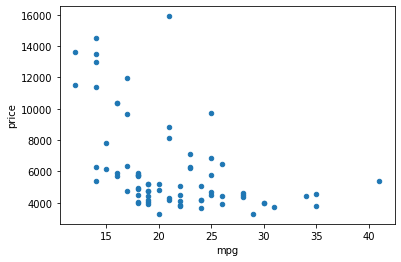

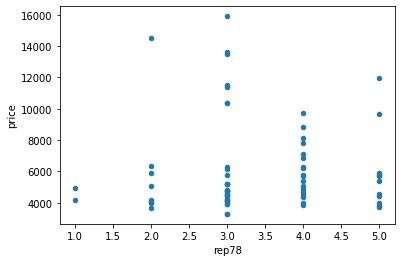

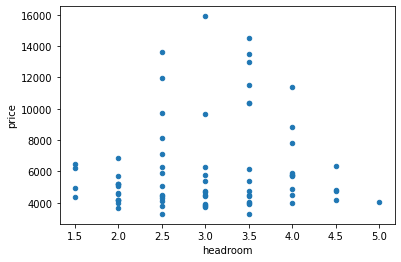

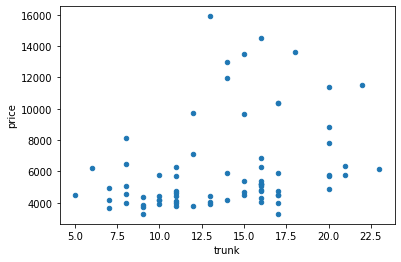

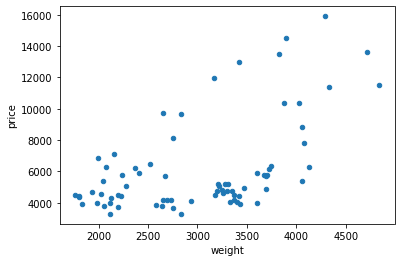

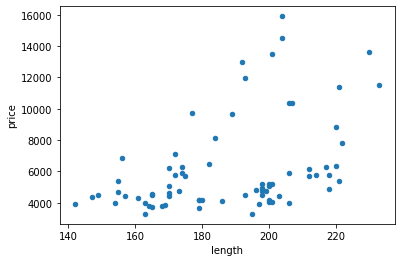

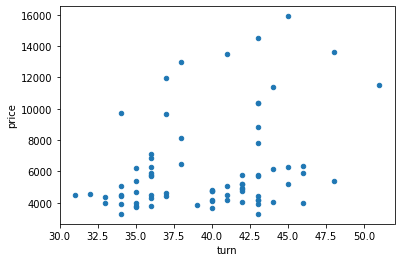

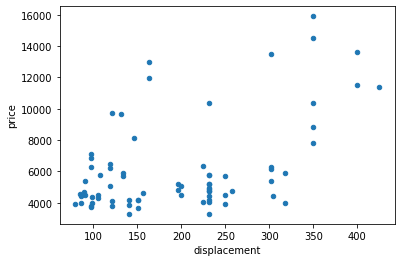

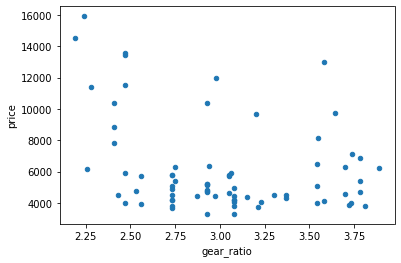

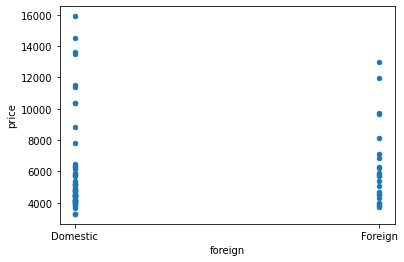

In [7]:
for i in df.columns:
    if i != 'price':
        df.plot.scatter(x = i, y = 'price')

Интересно посмотреть на среднюю цену модели

In [28]:
make_df = df[['make', 'price']].groupby(['make']).mean().sort_values(by=['price']).reset_index()
make_df['num_make'] = np.arange(len(make_df['make']))
make_df = make_df[['make', 'num_make']]

In [31]:
df = df.join(make_df.set_index('make'), on='make')

In [33]:
df.head()

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign,num_make
0,AMC Concord,4099,22,3.0,2.5,11,2930,186,40,121,3.58,Domestic,14
1,AMC Pacer,4749,17,3.0,3.0,11,3350,173,40,258,2.53,Domestic,33
2,AMC Spirit,3799,22,NaN,3.0,12,2640,168,35,121,3.08,Domestic,5
3,Buick Century,4816,20,3.0,4.5,16,3250,196,40,196,2.93,Domestic,34
4,Buick Electra,7827,15,4.0,4.0,20,4080,222,43,350,2.41,Domestic,59


<Axes: xlabel='num_make', ylabel='price'>

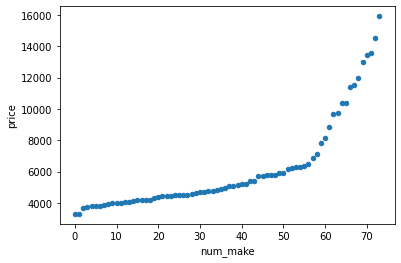

In [34]:
df.plot.scatter(x = 'num_make', y = 'price')

Интересное замечание, что зависимость линейная на двух участках. 

Далее хотелось бы посмотреть на график цены, когда не было ремонта (на графике зависимости цены от ремонта это не указалось, так как значение "не было ремонта" это Nan), заменим nan в этом столбце.

In [36]:
df['rep78'] = df['rep78'].fillna(0)

<Axes: xlabel='rep78', ylabel='price'>

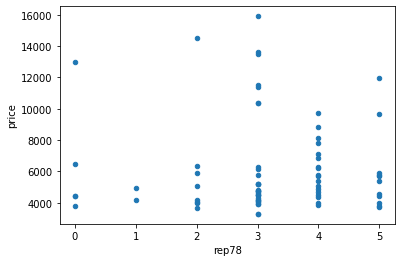

In [38]:
df.plot.scatter(x = 'rep78', y = 'price')

В первоначальную модель я бы не включал количество ремонта, какая-то странная зависимость.

Исследуя графики, я заметил, что на графике с пробегом неплохо вырисовывается линейная зависимость, как раз логичная - чем больше пробегЮ тем меньше цена. Столбец 'mpg' включу в первоначальную модель.

Также интересные столбцы 'length', 'weight' и 'displacement', которые показывают вполне логичную линейную связь.

Итак, построим модель

In [40]:
import statsmodels.api as sm
import seaborn as sns

In [87]:
data1 = df[['mpg', 'weight', 'num_make', 'displacement']]

<Axes: >

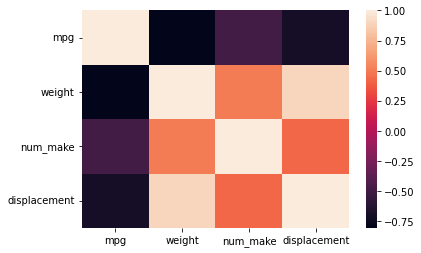

In [80]:
sns.heatmap(data1.corr())

Заметим, что вес и объем двигателя довольно сильно коррелируют. Запомним это.

In [81]:
data1['const'] = 1
results = sm.OLS(endog=df['price'], exog=data1).fit()
results.summary()

C:\Users\lubin\AppData\Local\Temp\ipykernel_13860\93811314.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['const'] = 1


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     49.39
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           1.49e-19
Time:                        12:20:48   Log-Likelihood:                -645.71
No. Observations:                  74   AIC:                             1301.
Df Residuals:                      69   BIC:                             1313.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
mpg             44.5867     53.725      0.830      0.409     -62.591     151.765
weight           0.3735      0.635      0.589      0.558      -0.893       1.640
num_make       107.3584      9.838     10.912      0.000      87.732     126.985
displacement     4.3114      4.420      0.975      0.333      -4.507      13.129
const         -681.4159   2324.307     -0.293      0.770   -5318.282    3955.450
==============================================================================
Omnibus:                       10.781   Durbin-Watson:                   1.232
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               10.842
Skew:                           0.887   Prob(JB):                      0.00442
Kurtosis:                       3.610   Cond. No.                     4.05e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Расскажите немного, почему вы выбрали именно эти переменные
- Какие зависимости вы ожидали увидеть? Можете подкрепить свои гипотезы графиками
- Как зависимости в итоге увидели? Как вы считаете почему?

На первые 2 вопроса я ответил выше. 

Увидел странную зависимость от пробега, совсем не ожидаемую, так как чем больше пробег - тем меньше должна быть цена. И от веса автомобиля как будто ничего не зависит. Также Cond. No. очень большое, постраемся это исправить.

- Теперь же давайте посмотрим на данную модель немного скептически
- Вы прошли предпосылки теоремы Г.М. и знаете о том, как тестировать на наличие нарушений этих предпосылок, как исправлять их, если возможно, и какие последствия они могут нести
- Собственно, давайте их и проверим

In [82]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

Посмотрим на vif

In [94]:
data1 = df[['mpg', 'weight', 'num_make', 'displacement']]

In [95]:
[vif(data1.values, i) for i in range(data1.shape[1])]

[6.621331821286773, 50.812076339718544, 5.302635178625533, 26.36480670207517]

Видно, что вес и объем двигателя имеют большее значение VIF.

Я предлагаю не убирать одно из них, а взять отношение объема двигателя к весу авто.

In [98]:
df['dis_w'] = df['displacement'] / df['weight']

In [99]:
data1 = df[['mpg', 'num_make', 'dis_w']]
data1['const'] = 1 

C:\Users\lubin\AppData\Local\Temp\ipykernel_13860\284311734.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['const'] = 1


In [102]:
[[data1.columns[i], vif(data1.values, i)] for i in range(data1.shape[1])]

[['mpg', 1.5867082534260972],
 ['num_make', 1.3136953772947144],
 ['dis_w', 1.2568267167185412],
 ['const', 66.71858701351503]]

<Axes: xlabel='dis_w', ylabel='price'>

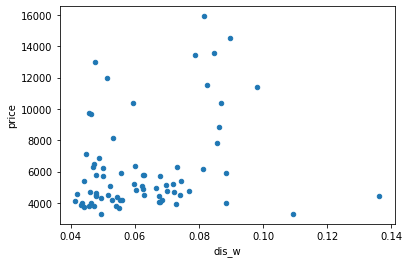

In [103]:
df.plot.scatter(x = 'dis_w', y = 'price')

Построим модель

In [105]:
results = sm.OLS(endog=df['price'], exog=data1).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     62.02
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           1.12e-19
Time:                        12:50:33   Log-Likelihood:                -647.73
No. Observations:                  74   AIC:                             1303.
Df Residuals:                      70   BIC:                             1313.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
mpg          -16.7162     40.131     -0.417      0.678     -96.755      63.323
num_make     111.6149      9.823     11.362      0.000      92.023     131.207
dis_w       1.422e+04   1.16e+04      1.227      0.224   -8891.715    3.73e+04
const       1554.3615   1495.346      1.039      0.302   -1428.012    4536.735
==============================================================================
Omnibus:                       14.106   Durbin-Watson:                   1.247
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.433
Skew:                           0.998   Prob(JB):                     0.000445
Kurtosis:                       4.012   Cond. No.                     2.92e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Мультиколлинеарность не разрешена, судя по Cond. No.

Далее, судя по графикам, я бы проверил на гетероскедастичность. Использовать буду тест Уайта.

In [107]:
import statsmodels.formula.api as smf

In [125]:
data1 = df[['price', 'num_make', 'dis_w', 'length']]
data1.columns

Index(['price', 'num_make', 'dis_w', 'length'], dtype='object')

In [126]:
model_white = smf.ols('price ~ num_make + dis_w + length', data=data1).fit()

In [127]:
sm.stats.diagnostic.het_white(model_white.resid, sm.add_constant(data1[['num_make', 'dis_w', 'length']]))

(41.38897366758969,
 4.248978692763074e-06,
 9.025217039323053,
 1.1774729690252015e-08)

<Axes: xlabel='dis_w', ylabel='price'>

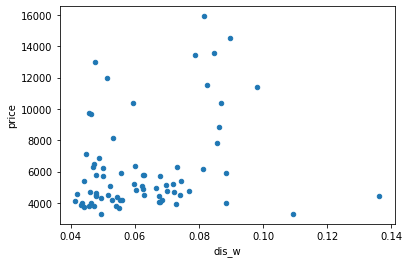

In [128]:
data1.plot.scatter(x = 'dis_w', y = 'price')

Видим, что действительно гетероскедастичность есть

In [129]:
data1['price'] = np.log(data1['price'].to_numpy())

C:\Users\lubin\AppData\Local\Temp\ipykernel_13860\1589515566.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['price'] = np.log(data1['price'].to_numpy())


In [134]:
model_white = smf.ols('price ~ num_make + dis_w', data=data1).fit()

In [135]:
sm.stats.diagnostic.het_white(model_white.resid, sm.add_constant(data1[['num_make', 'dis_w']]))

(39.4659758479733,
 1.9133831313384652e-07,
 15.542274169080207,
 3.550300001073943e-10)

In [136]:
model_white.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     224.2
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           2.09e-31
Time:                        13:28:40   Log-Likelihood:                 38.410
No. Observations:                  74   AIC:                            -70.82
Df Residuals:                      71   BIC:                            -63.91
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.9511      0.065    121.581      0.000       7.821       8.082
num_make       0.0167      0.001     20.478      0.000       0.015       0.018
dis_w          1.2720      0.984      1.293      0.200      -0.690       3.234
==============================================================================
Omnibus:                        5.183   Durbin-Watson:                   1.342
Prob(Omnibus):                  0.075   Jarque-Bera (JB):                5.153
Skew:                           0.608   Prob(JB):                       0.0760
Kurtosis:                       2.564   Cond. No.                     2.44e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Перед тем как бездумно проверять на все подряд, предположите, какие именно предпосылки могут быть нарушение
- Обоснуйте свои предпосылки. Почему вы так считаете? 
- Какие еще графики можно построить, чтобы сделать диагностику модели?
- Можно ли как-то "починить" модель, если было обнаружено нарушение предпосылки теоремы Г.М.? 
- Все ли нарушения предпосылок вы проверили? 

Почему я проверял мультиколлиненарность и гетероскедастичность я объяснил выше. 
Эндогенность я бы здесь не проверял, так как данные о машинах - это не какие-то измерения, это точно заверенные числа по бумажкам,
так что я решил проверить на мультиколлиненарность и на гетероскедастичность. Меня смущает конечный Cond. No., но скорее всего 
это из-за масштаба в данных. Сверхбольших коэффициентов получено не было. F-static говорит, что регрессия значима в целом.

Я старался все модификации в данных показывать на графиках, поэтому я не знаю какие еще можно графики поанализировать. 
Возомжно я совершил ошибку, пронумеровав модели авто по возрастанию цены, но к сожалению другого способа учесть модели авто я 
не придумал.

Если обнаружено нарушение предпосылки теоремы Г.М., конечно, я думаю можно как-то починить модель модификацией данных. Но нужно 
учитывать откуда эти данные пришли, как они измерены и т.д. 

- Улучшилась ли ваша моделька?
- Как вы считаете, всегда надо "добивать" нарушения предпосылок теорему Г.М.? 
- Что бы вы предпочли, логичную с точки зрения здравого смысла и бизнес сенса модель, но с какими-то нарушениями теоремы Г.М. или же модель, в которой нет нарушений, но при этом совершенно непонятно, почему те или иные переменные в ней оказались? А возможен ли вообще второй случай по вашему мнению?

Работая над мультиколлинеарностью и гетероскедастичностью удалось улучшить модель. Я думаю, еще бы лучше можно было бы получить 
статистические значения, если дополнительно стандартизовать данные.

Я думаю, всегда надо прежде всего анализировать и предполагать, что от чего должно зависеть и отбирать первоначальные признаки опираясь на свой бизнес сенс и здравый смысл, а потом "докручивать" модель не сильно отклоняясь от первоначальных признаков. Когда мы получаем модель нарушений, но совершенно непонятно как там оказались те или иные признаки, мы не можем эту модель интерпретировать и делать какие-то реальные выводы.